## Using KNN Algorithm for Student Sleep Pattern dataset

In [ ]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the CSV file into a DataFrame
data = pd.read_csv('../../data/sleep_patterns/student_sleep_patterns.csv')

# Display basic information about the DataFrame
data.info()

# Display summary statistics for numerical columns
data.describe()

# Display the number of missing values in each column
data.isnull().sum()

# Display the unique values in each column
for column in data.columns:
    print(f"{column}: {data[column].unique()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Student_ID         500 non-null    int64  
 1   Age                500 non-null    int64  
 2   Gender             500 non-null    object 
 3   University_Year    500 non-null    object 
 4   Sleep_Duration     500 non-null    float64
 5   Study_Hours        500 non-null    float64
 6   Screen_Time        500 non-null    float64
 7   Caffeine_Intake    500 non-null    int64  
 8   Physical_Activity  500 non-null    float64
 9   Sleep_Quality      500 non-null    int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 39.2+ KB
Student_ID: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60 

In [333]:
# Drop rows with missing values
data = data.dropna()

# Drop the Student_ID column
data = data.drop(['Student_ID'], axis=1)

# Encode categorical variables (if any)
data['Gender'] = data['Gender'].astype('category').cat.codes
data['University_Year'] = data['University_Year'].astype('category').cat.codes

# Separate features and target
X = data.drop(['Sleep_Quality'], axis=1)
y = data['Sleep_Quality']

# Normalize or standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [334]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', p=2)

# Train the KNN classifier
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print(classification_report(y_test, y_pred))



Accuracy: 0.12
              precision    recall  f1-score   support

          -3       0.14      0.20      0.17         5
          -2       0.00      0.00      0.00         4
          -1       0.00      0.00      0.00         6
           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         1
           2       0.14      0.17      0.15         6
           3       0.29      0.22      0.25         9
           4       0.08      0.11      0.10         9
           5       0.14      0.12      0.13         8
           6       0.25      0.17      0.20        12
           7       0.00      0.00      0.00        10
           8       0.21      0.30      0.25        10
           9       0.00      0.00      0.00         6
          10       0.00      0.00      0.00         2
          11       1.00      0.33      0.50         3
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14

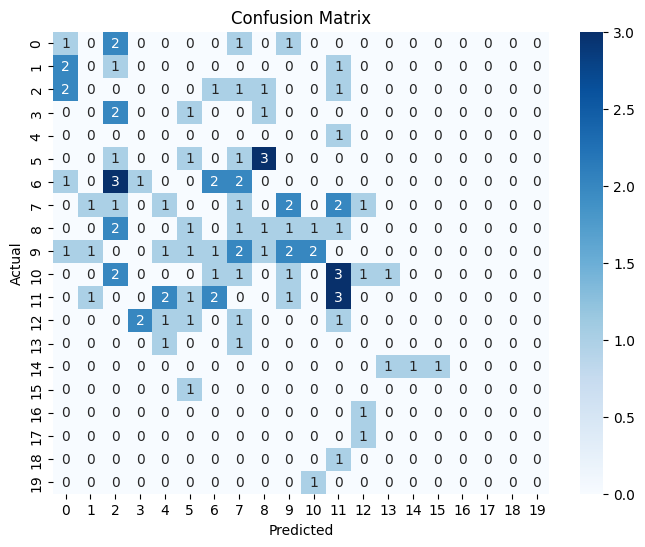

In [335]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

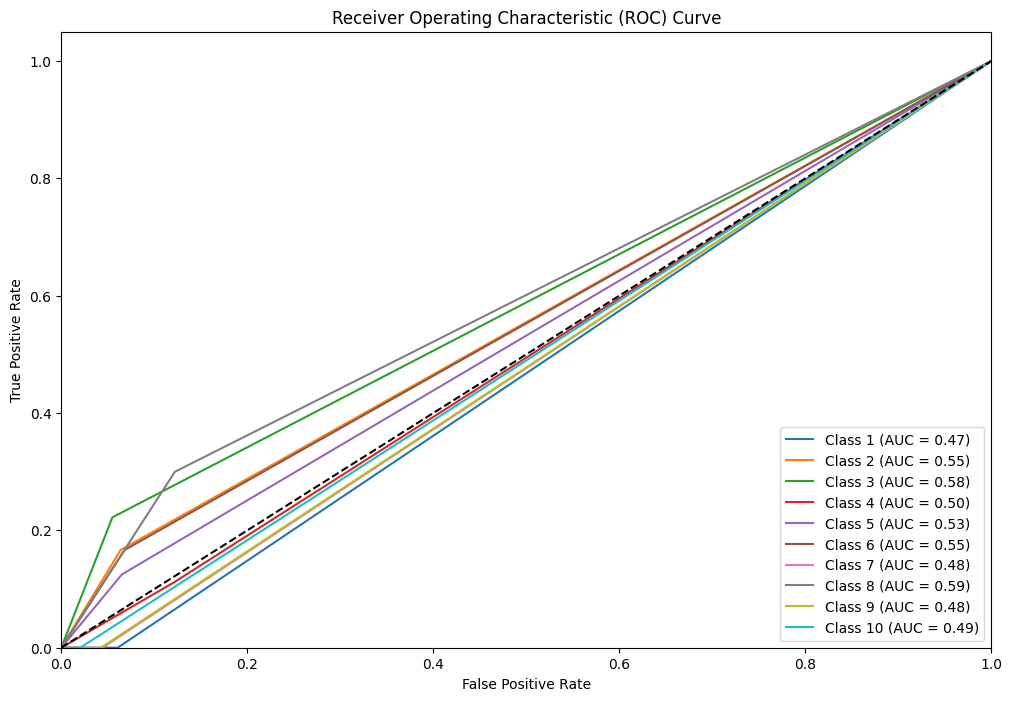

In [336]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y_pred_binarized = label_binarize(y_pred, classes=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_pred_binarized[:, i])

# Plot ROC curve for each class
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'Class {i+1} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

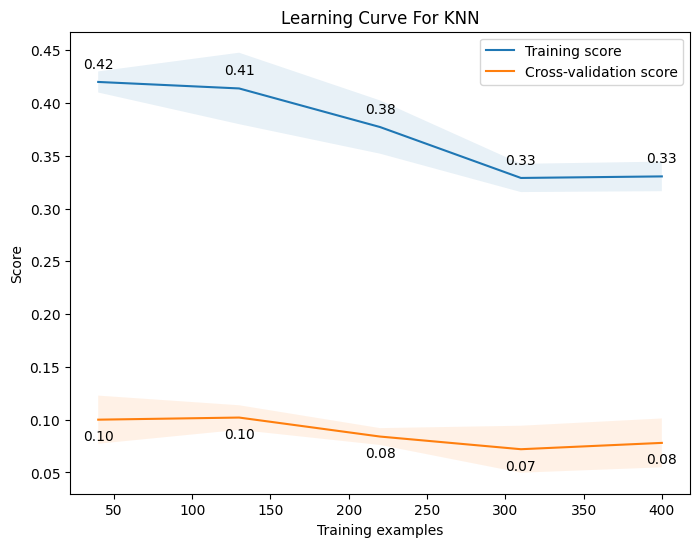

In [337]:
from sklearn.model_selection import learning_curve

# Compute learning curve
train_sizes, train_scores, test_scores = learning_curve(knn, X, y, cv=5, scoring='accuracy', n_jobs=-1)

# Calculate mean and standard deviation
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_mean = test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1)

# Annotate the points with their values
for i in range(len(train_sizes)):
    plt.annotate(f'{train_scores_mean[i]:.2f}', (train_sizes[i], train_scores_mean[i]), textcoords="offset points", xytext=(0,10), ha='center')
    plt.annotate(f'{test_scores_mean[i]:.2f}', (train_sizes[i], test_scores_mean[i]), textcoords="offset points", xytext=(0,-15), ha='center')

plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve For KNN')
plt.legend(loc='best')
plt.show()